1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#загружаем датафрейм
water = pd.read_csv('water.csv')
water

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

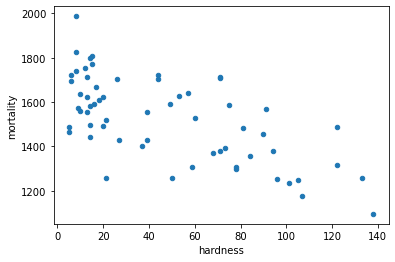

In [60]:
water.plot(kind='scatter', x='hardness', y='mortality')
#стоим точечный график, видим , что обратная линейная зависимость жесткости воды и смертности

In [54]:
water[['hardness', 'mortality']].corr()
#коэффициент корреляции подтвержает, что зависимость обратная 

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [55]:
water[['hardness', 'mortality']].corr(method='spearman')
#Спирман подтвержает, что зависимость обратная 

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [56]:
water[['hardness', 'mortality']].corr(method='kendall')
#Кенделл. подтвержает, что зависимость обратная 

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
X = water[['hardness']]
y = water['mortality']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [58]:
X_train.shape
#для тренировки берем 42 города из 61

(42, 1)

In [57]:
y_train.shape
#для тренировки берем 42 города из 61

(42,)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)
#обучаем модель

LinearRegression()

In [22]:
model.coef_

array([-3.13167087])

In [23]:
model.intercept_

1668.9722977277095

In [24]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [61]:
model.score(X_test, y_test)
#коэффициент детерминации 0,5. Модель неплоха, но не столь точно объясняет зависимость

0.5046490611017092

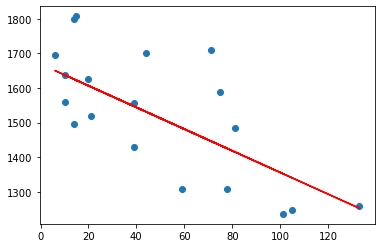

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
#Точки реальных данных тестовой выборки и красная линия предсказания

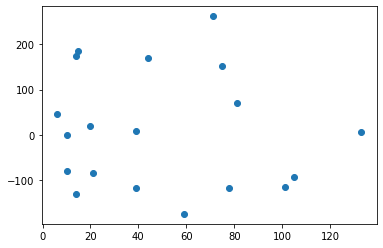

In [62]:
plt.scatter(X_test, (y_test-y_pred))
#разброс остатков, максимальное отклонение около +250 смертей, в минус около - 200

In [68]:
North = water[water.location == 'North']
South = water[water.location == 'South']
South

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

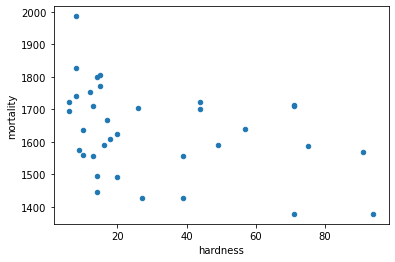

In [70]:
North.plot(kind='scatter', x='hardness', y='mortality')
#видим, что зависимость по факту исчезла

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

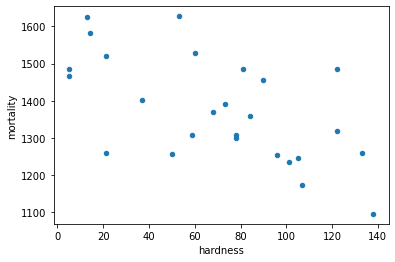

In [75]:
South.plot(kind='scatter', x='hardness', y='mortality')
#видим, что здесь прослеживается обратная линейность


In [76]:
North[['hardness', 'mortality']].corr()
#видим, что зависимость по факту исчезла

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [77]:
South[['hardness', 'mortality']].corr()
#видим, что здесь прослеживается обратная линейность

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [78]:
North[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [79]:
South[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [80]:
North[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [81]:
South[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [82]:
XN = North[['hardness']]
yN = North['mortality']

In [83]:
XN_train, XN_test, yN_train, yN_test = train_test_split(XN, yN, test_size=0.30, random_state=42)

In [97]:
modelN = LinearRegression()
modelN.fit(XN_train, yN_train)
#обучаем модель

LinearRegression()

In [103]:
yN_pred = modelN.predict(XN_test)
yN_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [104]:
modelN.score(XN_test, yN_test)
#Видно, что модель плохо объясняет зависимость, т.к. коэф детерминации близок к 0

0.018885304285745863

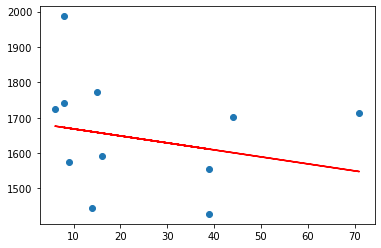

In [105]:
plt.scatter(XN_test, yN_test)
plt.plot(XN_test, yN_pred, c='r')

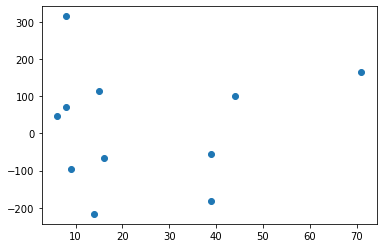

In [106]:
plt.scatter(XN_test, (yN_test-yN_pred))
#ошибки стали больше

In [93]:
XS = South[['hardness']]
yS = South['mortality']

In [94]:
XS_train, XS_test, yS_train, yS_test = train_test_split(XS, yS, test_size=0.30, random_state=42)

In [96]:
modelS = LinearRegression()
modelS.fit(XS_train, yS_train)

LinearRegression()

In [102]:
yS_pred = modelS.predict(XS_test)
yS_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [110]:
modelS.score(XS_test, yS_test)
#модель совсем плохая

-2.551922301235205

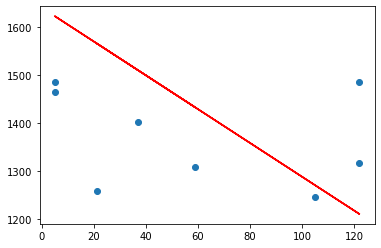

In [111]:
plt.scatter(XS_test, yS_test)
plt.plot(XS_test, yS_pred, c='r')

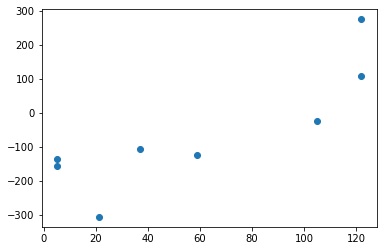

In [112]:
plt.scatter(XS_test, (yS_test-yS_pred))

In [ ]:
#Вывод: с разделением датафрейма на 2, модель линейной регрессии не дает описания зависимости.